In [1]:
%load_ext rpy2.ipython

/Users/najwalaabid/miniconda3/envs/scphere/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
%%R

library("rgl")
library(densitycut) # 
library(robustbase)

/Users/najwalaabid/miniconda3/envs/scphere/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: This build of rgl does not include OpenGL functions.  Use
 rglwidget() to display results, e.g. via options(rgl.printRglwidget = TRUE).

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R

PlotSphere = function(x, cluster, col, density=FALSE, legend=FALSE) {
  if (missing(col)) {
    col = distinct.col
  }
  if (density == FALSE) {
    col.point = AssignLabelColor(col, cluster, 
                                 uniq.label = sort(unique(cluster)))
  } else {
    colours = colorRampPalette((brewer.pal(7, "YlOrRd")))(10)
    FUN = colorRamp(colours)
    
    cluster = (cluster - min(cluster)) / diff(range(cluster))
    col.point = rgb(FUN(cluster), maxColorValue=256)
  }
  plot3d(x[, 1:3], col = col.point, 
         xlim=c(-1, 1), ylim=c(-1, 1), zlim=c(-1, 1), 
         box=FALSE, axes=FALSE, xlab='', ylab='', zlab='')
  
  arrow3d(c(0, -1.35, 0), c(0, 1.35, 0), 
          col = 'gray', s=0.04, type='extrusion', lit=FALSE)
  
  spheres3d(0, 0, 0, lit=FALSE, color='#dbd7d2', 
            alpha=0.6, radius=0.99)
  spheres3d(0, 0, 0, radius=0.9999, lit=FALSE, color='gray', 
            front='lines', alpha=0.6)
  
  if (density == FALSE) {
    id = !duplicated(cluster)
    col.leg = AssignLabelColor(col, cluster)[id]
    leg = cluster[id]
    names(col.leg) = leg
    
    if (legend == TRUE) {
      legend3d("topright", legend = leg, 
               pch = 16, col = col.leg, cex=1, inset=c(0.02)) 
    }
    
    cluster.srt = sort(unique(cluster))
    k.centers = sapply(cluster.srt, function(zz) {
      cat(zz, '\t')
      id = cluster == zz
      center = colMedians(as.matrix(x[id, , drop=FALSE]))
    })
    
    k.centers = t(k.centers)
    
    cluster.size = table(cluster)[as.character(cluster.srt)]
    id = which(cluster.size > 0)
    
    if (length(id) > 0) {
      k.centers = k.centers[id, , drop=FALSE]
      cluster.srt = cluster.srt[id]
    }
    
    k.centers = k.centers / sqrt(rowSums(k.centers^2)) * 1.15
    text3d(k.centers, texts=cluster.srt, col='black')
  }
}

In [4]:
%%R

cell.type = read.delim('../demo-out/cite_cell_types.tsv', header=FALSE, stringsAsFactors = FALSE)[,1]

x = read.delim('../demo-out/cite_latent_250epoch.tsv', sep=' ', header=FALSE)

PlotSphere(x, cell.type)

CD14+ Mono 	

In [6]:
%%R 
rglwidget()

In [ ]:
#%%R
# can't open browser in server anyway => look for alternative to visualize 3D plot in notebook

# rgl.snapshot('../demo-out/uc_epi_latent_250epoch_scphere.png',  fmt='png')

# browseURL(writeWebGL(filename=paste('../demo-out/', 
#                                     'uc_epi_latent_250epoch_scphere.html', sep='/'),
#                      browser = getOption("browser"),
#                      width=1000))

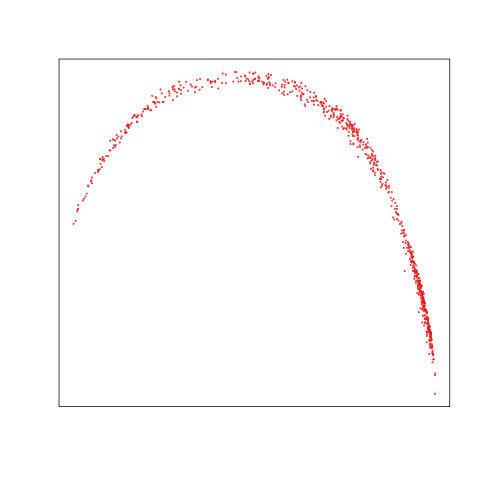

In [ ]:
%%R
library(sphereplot)
y = car2sph(x)

col = AssignLabelColor(distinct.col, cell.type)
NeatPlot(y[, 1:2], col=col, cex=0.25, 
         cex.axis=1, xaxt='n', yaxt='n')